#Introduction
###In this notebook, we will explore the application of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the  Penguins Species dataset. This dataset contains observations of penguin species, and our goal is to uncover natural groupings within the data without prior knowledge of the species labels.

##Why DBSCAN?

###DBSCAN is a powerful clustering algorithm known for its ability to:

* Identify clusters of varying shapes and sizes.
* Handle noise and outliers effectively.
* Operate without needing to specify the number of clusters in advance.

###These characteristics make DBSCAN a suitable choice for our penguin species dataset, where we aim to detect natural clusters and potentially noisy data points.

###About this file

* The dataset consists of 5 columns:

* culmen_length_mm: culmen length (mm)

* culmen_depth_mm: culmen depth (mm)

* flipper_length_mm: flipper length (mm)

* body_mass_g: body mass (g)

* sex: penguin sex

###Source:
https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

##Importing Necessary Libraries

In [1]:
import numpy as np #NumPy is a powerful tool for numerical computations in Python.
import pandas as pd  #Pandas is a powerful library for data manipulation and analysis.
import seaborn as sns #Seaborn is a statistical data visualization library based on Matplotlib.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

##Reading the Dataset in a pandas dataframe.

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head() #Displays the first 5 rows of the dataset.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.columns #Displays columns names of the dataset.

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df.shape #Displays the total count of the Rows and Columns respectively.

(344, 5)

In [6]:
df.sample(10) #Displays random samples.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
239,48.7,15.1,222.0,5350.0,MALE
306,43.4,14.4,218.0,4600.0,FEMALE
246,44.5,14.3,216.0,4100.0,NaN
251,42.8,14.2,209.0,4700.0,FEMALE
206,42.5,17.3,187.0,3350.0,FEMALE
328,43.3,14.0,208.0,4575.0,FEMALE
311,52.2,17.1,228.0,5400.0,MALE
223,50.0,15.2,218.0,5700.0,MALE
320,48.5,15.0,219.0,4850.0,FEMALE
301,52.5,15.6,221.0,5450.0,MALE


In [7]:
df.info() # Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [8]:
df.isnull().sum() # Displays the total count of the null values in the particular columns.

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Here we can check that, there are some missing values in the dataset.

In [9]:
df = df.dropna()#Dropping the missing values using the dropna function.

In [10]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now as we have alredy dropped the missing values, now there is no missing value.

In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


The df.describe() function in pandas provides a statistical summary of the numerical columns in a DataFrame df. Here’s what it typically includes:

count: The number of non-null observations.

mean: The average of the values.

std: The standard deviation of the values.

min: The minimum value.

25%: The 25th percentile (first quartile).

50%: The 50th percentile (median).

75%: The 75th percentile (third quartile).

max: The maximum value.

In [12]:
df = df.drop(columns=['sex']) #For simplicity, we'll drop the 'sex' column

In [13]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) #Features are standardized to have zero mean and unit variance using StandardScaler.

In [15]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(df_scaled)

In [16]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  0,  0,  0,  0,  2, -1,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

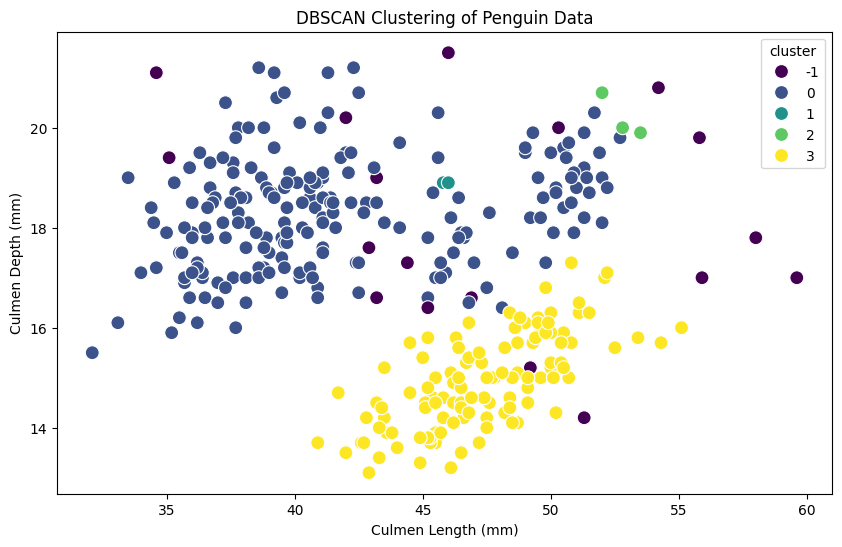

In [17]:
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering of Penguin Data')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

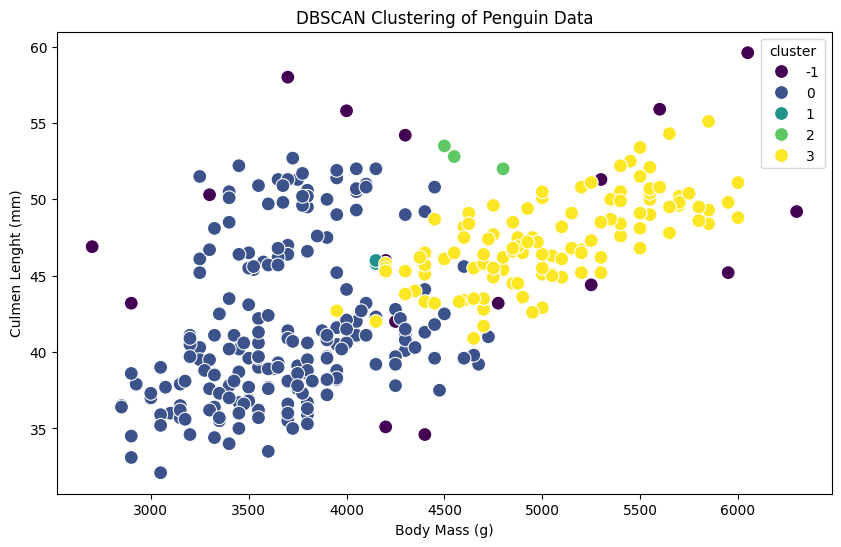

In [18]:
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='body_mass_g', y='culmen_length_mm', hue='cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering of Penguin Data')
plt.xlabel('Body Mass (g)')
plt.ylabel('Culmen Lenght (mm)')
plt.show()

